In [1]:
import pandas as pd
cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
cancer.columns=['ID', 'Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses', 'Class']
cancer = cancer[~((cancer['Bare_Nuc'] == '?' ))].astype(int)
cols=['Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses']
cancer.head()
cancer.astype(int)

,ID,Clump_Thickness,U_Cell_Size,U_Cell_Shape,Marg_Adhes,Epi_Cell_Size,Bare_Nuc,Chromatin,Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

X = cancer.iloc[0:, 1:10].values
X_train,X_test,y_train,y_test = train_test_split(X,cancer['Class'], test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

/home/witcher/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 5.98400473  0.77117305  0.53772561  0.08664223  0.43535926  0.39181737
  0.24832426  0.26710612  0.29675494]


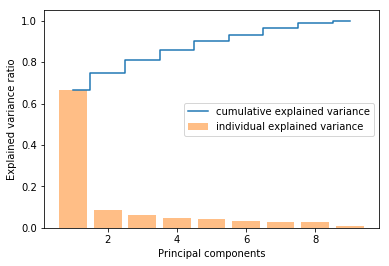

In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,10), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1,10), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [9]:
eigen_pairs =[(np.abs(eigen_vals[i]),eigen_vecs[:,i])
...        for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [10]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis],
...
eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[-0.30455817 -0.11606564]
 [-0.37807406 -0.06546062]
 [-0.37826648 -0.06257214]
 [-0.33008709 -0.08714724]
 [-0.33450391  0.11156734]
 [-0.34015976 -0.26837662]
 [-0.34779464 -0.20402415]
 [-0.33339222  0.08292489]
 [-0.22923417  0.91529126]]


In [11]:
X_train_std[0].dot(w)

array([-2.37835349, -0.52758462])

In [12]:
X_train_pca = X_train_std.dot(w)

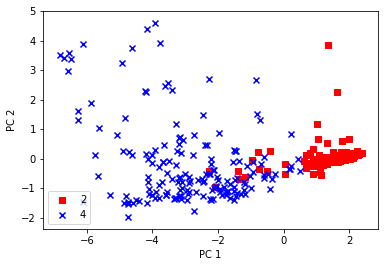

In [13]:
colors = ['r', 'b', 'green','orange']
markers = ['s', 'x', 'o','^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
    X_train_pca[y_train==l, 1],
    c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

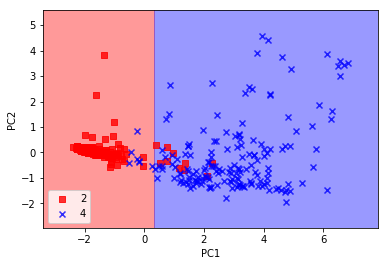

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'orange', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
# plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

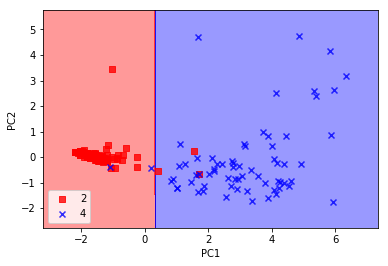

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [16]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.66349552,  0.08550626,  0.05962203,  0.04827184,  0.04344399,
        0.03290365,  0.02961624,  0.02753374,  0.00960673])